In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier


In [4]:
! pip install xgboost
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold
pd.set_option('display.max_columns',None)
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [5]:
df = pd.read_excel('Historical_data.xlsx')
y = df['term_deposit_subscribed']
X = df.drop(['customer_id','term_deposit_subscribed'], axis=1)

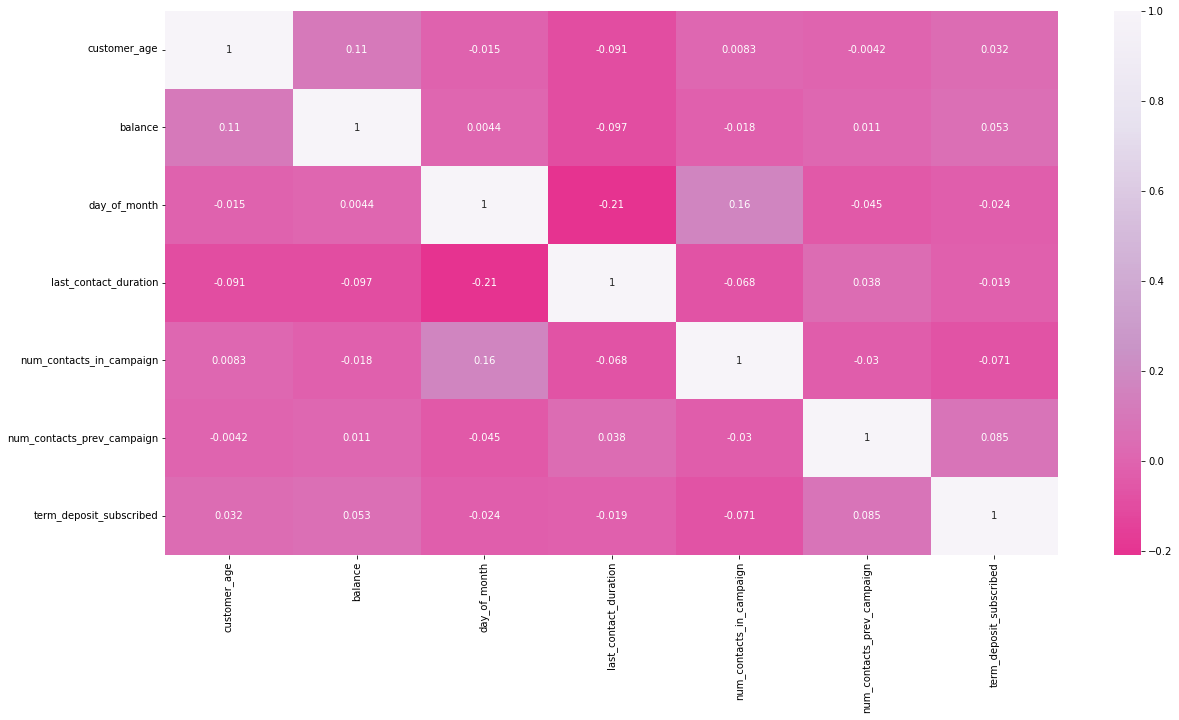

In [6]:
data = df.drop('customer_id', axis=1)
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,center = 0 , cmap ='PuRd_r');


In [7]:
#Converting string data to numerical data using one-hot encoding
categ = []
for col, value in X.iteritems():
    if value.dtype == 'object':
        categ.append(col)
df_cat = df[categ]
df_cat = pd.get_dummies(df_cat)
df = pd.concat([df, df_cat],  axis = 1)

In [8]:
for col in df.columns:
    print(col)

customer_id
customer_age
job_type
marital
education
default
balance
housing_loan
personal_loan
communication_type
day_of_month
month
last_contact_duration
num_contacts_in_campaign
num_contacts_prev_campaign
prev_campaign_outcome
term_deposit_subscribed
job_type_admin.
job_type_blue-collar
job_type_entrepreneur
job_type_housemaid
job_type_management
job_type_retired
job_type_self-employed
job_type_services
job_type_student
job_type_technician
job_type_unemployed
job_type_unknown
marital_divorced
marital_married
marital_single
education_primary
education_secondary
education_tertiary
education_unknown
default_no
default_yes
housing_loan_no
housing_loan_yes
personal_loan_no
personal_loan_yes
communication_type_cellular
communication_type_telephone
communication_type_unknown
month_apr
month_aug
month_dec
month_feb
month_jan
month_jul
month_jun
month_mar
month_may
month_nov
month_oct
month_sep
prev_campaign_outcome_failure
prev_campaign_outcome_other
prev_campaign_outcome_success
prev_campai

In [9]:
#As it is evident that new encoded features have been added to the dataframe (and are all numeric data) but the original ones 
#are not removed. 
#So we drop those columns.
df = df.drop(['job_type','marital','education','default','housing_loan','personal_loan','communication_type','month','prev_campaign_outcome'], axis=1)
print("Shape of the dataframe is", df.shape)
df.head()

Shape of the dataframe is (23880, 52)


,customer_id,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,job_type_admin.,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,job_type_management,job_type_retired,job_type_self-employed,job_type_services,job_type_student,job_type_technician,job_type_unemployed,job_type_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_loan_no,housing_loan_yes,personal_loan_no,personal_loan_yes,communication_type_cellular,communication_type_telephone,communication_type_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_failure,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,id_32289,34.0,934.0,18,704,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,id_40992,41.0,1352.0,13,893,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,id_41178,57.0,495.0,18,796,4.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,id_35102,37.0,650.0,26,880,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,id_34750,29.0,265.0,19,795,2.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [10]:
#Removing rows with null values
df = df.dropna(axis=0)
y = df['term_deposit_subscribed']
X = df.drop(['customer_id','term_deposit_subscribed'], axis=1)
X.shape, y.shape

((23038, 50), (23038,))

In [11]:
for col in df.columns:
    print(col)

customer_id
customer_age
balance
day_of_month
last_contact_duration
num_contacts_in_campaign
num_contacts_prev_campaign
term_deposit_subscribed
job_type_admin.
job_type_blue-collar
job_type_entrepreneur
job_type_housemaid
job_type_management
job_type_retired
job_type_self-employed
job_type_services
job_type_student
job_type_technician
job_type_unemployed
job_type_unknown
marital_divorced
marital_married
marital_single
education_primary
education_secondary
education_tertiary
education_unknown
default_no
default_yes
housing_loan_no
housing_loan_yes
personal_loan_no
personal_loan_yes
communication_type_cellular
communication_type_telephone
communication_type_unknown
month_apr
month_aug
month_dec
month_feb
month_jan
month_jul
month_jun
month_mar
month_may
month_nov
month_oct
month_sep
prev_campaign_outcome_failure
prev_campaign_outcome_other
prev_campaign_outcome_success
prev_campaign_outcome_unknown


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=24)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16126, 50), (16126,), (6912, 50), (6912,))

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Accuracy: 0.8981481481481481
Precision: 1.0
Recall: 0.0014184397163120568


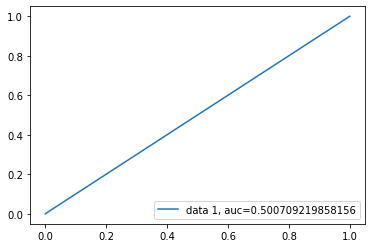

In [14]:
y_pred = model.predict(X_test)

print("Accuracy:",sklearn.metrics.accuracy_score(y_test, y_pred))
print("Precision:",sklearn.metrics.precision_score(y_test, y_pred))
print("Recall:",sklearn.metrics.recall_score(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [15]:
m1 = DecisionTreeClassifier(random_state=24)
m1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=24)

Accuracy: 0.8446180555555556
Precision: 0.282172373081464
Recall: 0.33900709219858155


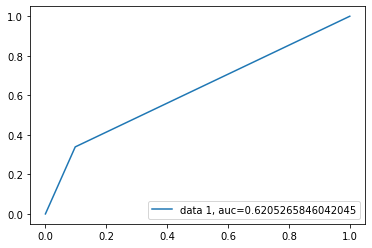

In [16]:
y_pred = m1.predict(X_test)

print("Accuracy:",sklearn.metrics.accuracy_score(y_test, y_pred))
print("Precision:",sklearn.metrics.precision_score(y_test, y_pred))
print("Recall:",sklearn.metrics.recall_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [17]:
m2 = GradientBoostingClassifier(learning_rate=0.5, n_estimators=100)
m2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5)

Accuracy: 0.9013310185185185
Precision: 0.5305039787798409
Recall: 0.28368794326241137


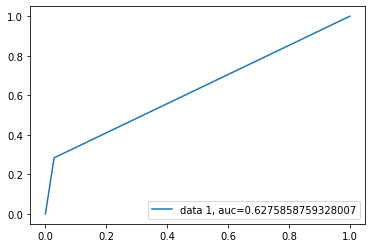

In [18]:
y_pred = m2.predict(X_test)
import sklearn
print("Accuracy:",sklearn.metrics.accuracy_score(y_test, y_pred))
print("Precision:",sklearn.metrics.precision_score(y_test, y_pred))
print("Recall:",sklearn.metrics.recall_score(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [19]:
m3 = XGBClassifier(learning_rate=0.01, n_estimators = 1000, random_state=24)
m3.fit(X_train, y_train)

[01:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=24,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy: 0.9071180555555556
Precision: 0.6046511627906976
Recall: 0.2581560283687943


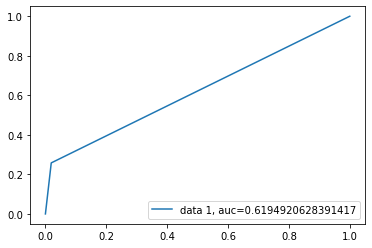

In [20]:
y_pred = m3.predict(X_test)
import sklearn
print("Accuracy:",sklearn.metrics.accuracy_score(y_test, y_pred))
print("Precision:",sklearn.metrics.precision_score(y_test, y_pred))
print("Recall:",sklearn.metrics.recall_score(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [21]:
from scipy import stats

In [22]:
#One way of using XGBClassifier
clf_xgb = XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.59),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }

numFolds = 5
kfold_5 = KFold(n_splits = numFolds)

clf = RandomizedSearchCV(clf_xgb, 
                         param_distributions = param_dist,
                         cv = kfold_5,  
                         n_iter = 5, # you want 5 here not 25 if I understand you correctly 
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

In [23]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[01:20:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=0,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_dep...
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FD128E2E50>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 

Accuracy: 0.9004629629629629
Precision: 0.5197215777262181
Recall: 0.3177304964539007


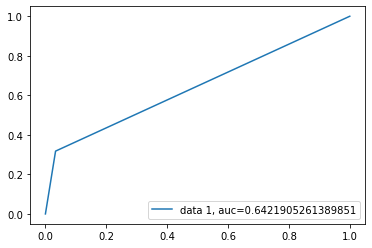

In [24]:
y_pred = clf.predict(X_test)

print("Accuracy:",sklearn.metrics.accuracy_score(y_test, y_pred))
print("Precision:",sklearn.metrics.precision_score(y_test, y_pred))
print("Recall:",sklearn.metrics.recall_score(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [25]:
m4 = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.2, learning_rate = 0.005, subsample = 1, random_state=24,
                max_depth = 15, alpha = 10, n_estimators = 2000, base_score=0.7)

m4.fit(X_train, y_train)


[01:20:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=10, base_score=0.7, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.2,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.005, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=8, num_parallel_tree=1,
              predictor='auto', random_state=24, reg_alpha=10, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Accuracy: 0.9113136574074074
Precision: 0.6982758620689655
Recall: 0.2297872340425532


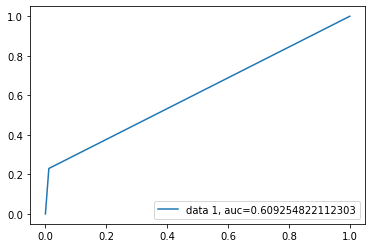

In [26]:
y_pred = m4.predict(X_test)

print("Accuracy:",sklearn.metrics.accuracy_score(y_test, y_pred))
print("Precision:",sklearn.metrics.precision_score(y_test, y_pred))
print("Recall:",sklearn.metrics.recall_score(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [27]:
!pip install lightgbm
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

In [28]:
#making an instance of the classifier
m5 = LGBMClassifier(objective='binary', n_estimators=1500, colsample_bytree=0.35, reg_alpha=0.2,reg_lambda=0.2, 
                        max_depth=2, learning_rate=0.01, random_state=24)

#fitting the model on train data
m5.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.35, learning_rate=0.01, max_depth=2,
               n_estimators=1500, objective='binary', random_state=24,
               reg_alpha=0.2, reg_lambda=0.2)

Accuracy: 0.9110243055555556
Precision: 0.7008928571428571
Recall: 0.2226950354609929


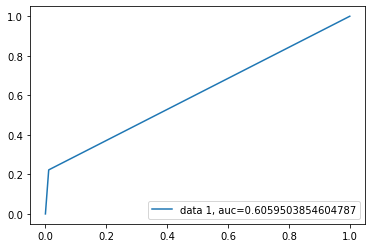

In [29]:
y_pred = m5.predict(X_test)

print("Accuracy:",sklearn.metrics.accuracy_score(y_test, y_pred))
print("Precision:",sklearn.metrics.precision_score(y_test, y_pred))
print("Recall:",sklearn.metrics.recall_score(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [30]:
dft = pd.read_excel("New_customer_list_data.xlsx", index_col = "customer_id")
print("Shape of the dataframe is", dft.shape)
dft.head()

Shape of the dataframe is (7767, 15)


,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,last_contact_duration,day_of_month,month,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome
customer_id,,,,,,,,,,,,,,,
id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,849,26,jun,4.0,0,unknown
id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,990,5,feb,4.0,0,unknown
id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,886,20,may,3.0,0,unknown
id_12681,65.0,retired,married,primary,no,2880.0,no,no,cellular,913,23,apr,1.0,0,unknown
id_2153,52.0,blue-collar,married,tertiary,no,1779.0,no,no,cellular,703,19,nov,3.0,1,failure


In [31]:
tcateg = []
for tcol, tvalue in dft.iteritems():
    if tvalue.dtype == 'object':
        tcateg.append(tcol)
dft_cat = dft[tcateg]
dft_cat = pd.get_dummies(dft_cat)
dft = pd.concat([dft, dft_cat], axis = 1)

In [32]:
dft = dft.drop(['job_type','marital','education','default','housing_loan','personal_loan','communication_type','month','prev_campaign_outcome'], axis=1)
dft.head()

,customer_age,balance,last_contact_duration,day_of_month,num_contacts_in_campaign,num_contacts_prev_campaign,job_type_admin.,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,job_type_management,job_type_retired,job_type_self-employed,job_type_services,job_type_student,job_type_technician,job_type_unemployed,job_type_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_loan_no,housing_loan_yes,personal_loan_no,personal_loan_yes,communication_type_cellular,communication_type_telephone,communication_type_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_failure,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
id_43823,28.0,285.0,849,26,4.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
id_10523,46.0,656.0,990,5,4.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
id_43951,34.0,2.0,886,20,3.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
id_12681,65.0,2880.0,913,23,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
id_2153,52.0,1779.0,703,19,3.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [33]:
print(dft.shape)
output= m5.predict_proba(dft)
print(output)
output
dft['term_deposit_subscribed'] = m5.predict(dft)
dft['term_deposit_subscribed']

(7767, 50)
[[0.88167163 0.11832837]
 [0.904627   0.095373  ]
 [0.93639839 0.06360161]
 ...
 [0.90762872 0.09237128]
 [0.92717301 0.07282699]
 [0.71572222 0.28427778]]


customer_id
id_43823    0
id_10523    0
id_43951    0
id_12681    0
id_2153     0
           ..
id_29917    0
id_9275     0
id_16678    0
id_26369    0
id_31483    0
Name: term_deposit_subscribed, Length: 7767, dtype: int64

In [34]:
new_dft=  pd.read_excel("New_customer_list_data.xlsx")
final_list= []
cus_id_list= new_dft['customer_id']
for i in range(len(output)):
    temp_list= []
    temp_list.append(cus_id_list[i])
    temp_list.append(output[i][1])
    final_list.append(temp_list)
    
# print(len(final_list), final_list[0])

def Sort(sub_li):
    return(sorted(sub_li, key = lambda x: x[1], reverse= True))

answer= Sort(final_list)
new_ans= []
for i in range(len(answer)):
    new_ans.append(answer[i][0])
    
print(new_ans[0:5])
new_dft['term_deposit_subscribed']=new_ans

['id_12218', 'id_20963', 'id_31090', 'id_34158', 'id_30565']


In [35]:
#Add customer_id to the exported csv
#dft['term_deposit_subscribed'].to_csv (r'{write your own path where ever you want the excel sheet to be}', index = True, header=True)

In [36]:
new_dft['term_deposit_subscribed'][0:1000].to_csv(('new_customer_output.csv'), index=False, header=False)

print(dft.shape)
dft.head()
dft= dft.drop(['term_deposit_subscribed'], axis=1)
# output= m5.predict_proba(dft)
# dft['term_deposit_subscribed'] = m5.predict(dft)
# dft['term_deposit_subscribed']